### 코로나 데이터 분석

In [1]:
# 환경설정
import pandas as pd
import seaborn as sns
import matplotlib as npl
import matplotlib.pyplot as plt
import folium

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드 및 확인
df = pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [2]:
df.sort_values(by='Date', ascending=False)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa
48904,NaN,El Salvador,13.794200,-88.896500,2020-07-27,15035,408,7778,6849,Americas
48902,NaN,Ecuador,-1.831200,-78.183400,2020-07-27,81161,5532,34896,40733,Americas
48901,NaN,Dominican Republic,18.735700,-70.162700,2020-07-27,64156,1083,30204,32869,Americas
48900,NaN,Djibouti,11.825100,42.590300,2020-07-27,5059,58,4977,24,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...
170,NaN,Niger,17.607789,8.081666,2020-01-22,0,0,0,0,Africa
169,NaN,Nicaragua,12.865416,-85.207229,2020-01-22,0,0,0,0,Americas
168,NaN,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,0,Western Pacific
167,NaN,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,0,Europe


### EDA

In [3]:
# 결측치 체크
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:
# 데이터 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


### 국가별 코로나 경과 확인 (확진자,사망자,회복자)

In [6]:
# 최신 데이터만 남기기
latest = df[df['Date'] == max(df['Date'])] #Date중 가장 큰 값 반환 즉 최신 날짜가 제일 큰값임 
# 2020-07=27일 기준으로 가장 최신 데이터만 남음 49068 -> 261 개열
latest

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
# 국가별 필요 데이터만 뽑기
latest_county = latest.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
latest_county

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


In [8]:
# 확진자 높은 국가순으로 정렬
# drop=True를 하게되면 바뀐 열이 적용 됨. 
latest_county_sum = latest_county.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
latest_county_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,14,0,13
185,Holy See,12,0,12


In [9]:
# 전체 데이터 보기 .style
# .style로 데이터를 명확하고 직관적이게 스타일링 가능 하다. 
latest_county_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
5,Mexico,395489,44022,303810
6,Peru,389717,18418,272547
7,Chile,347923,9187,319954
8,United Kingdom,301708,45844,1437
9,Iran,293606,15912,255144


### 시각화

In [10]:
# 각 컬럼별 합계
date_status = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


In [11]:
date_status.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  188 non-null    int64
 1   Deaths     188 non-null    int64
 2   Recovered  188 non-null    int64
dtypes: int64(3)
memory usage: 5.9 KB


<AxesSubplot:xlabel='Date'>

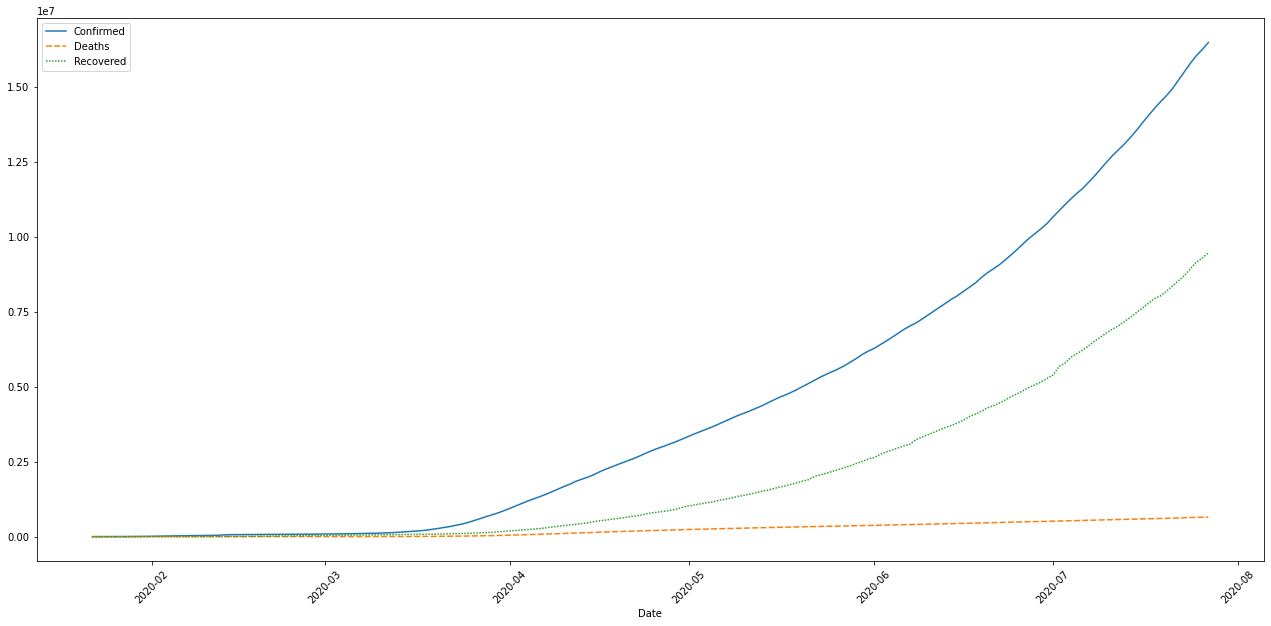

In [20]:
# 그래프
plt.figure(figsize=(22,10))
# plt.ylim(0, 20000000)
plt.xticks(rotation = 45)
sns.lineplot(data=date_status)

### Folium 사용

In [24]:
# folium 예제
folium.Map()

In [23]:
# 서울 표시
folium.Map(location=[37.5645159,126.973894])

In [27]:
# zoom 설정
folium.Map(location=[37.5645159,126.973894], zoom_start=18)

In [28]:
# 마크 그리기
m = folium.Map(location=[37.5645159,126.973894], zoom_start=18)
folium.CircleMarker([37.5645159,126.973894], radius=100).add_to(m)
m

In [31]:
# 색상
m = folium.Map(location=[37.5645159,126.973894], zoom_start=18)
folium.CircleMarker([37.5645159,126.973894], radius=100, color="red", fill=True, fill_color='red').add_to(m)
m

In [32]:
# pop-up
m = folium.Map(location=[37.5645159,126.973894], zoom_start=18)
folium.CircleMarker([37.5645159,126.973894], radius=100, color="red", fill=True,
                    fill_color='red',popup='Yo!').add_to(m)
m

### Folium으로 코로나 데이터 시각화

In [38]:
latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 48807 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  78 non-null     object        
 1   Country/Region  261 non-null    object        
 2   Lat             261 non-null    float64       
 3   Long            261 non-null    float64       
 4   Date            261 non-null    datetime64[ns]
 5   Confirmed       261 non-null    int64         
 6   Deaths          261 non-null    int64         
 7   Recovered       261 non-null    int64         
 8   Active          261 non-null    int64         
 9   WHO Region      261 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.5+ KB


In [49]:
# pop-up
m = folium.Map(location=[0,0],zoom_start=2)

for n in latest.index:
    folium.CircleMarker([latest['Lat'][n],latest['Long'][n]], radius=int(latest['Confirmed'][n]/100000), color="red", fill=True,
                    fill_color='red',popup=latest['Country/Region'][n]+": "+str(latest['Confirmed'][n])).add_to(m)
m

